In [1]:
import pandas as pd
import numpy as np
import math
from math import log
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import seaborn as sn
import matplotlib.pyplot as plot

In [2]:
data = pd.read_excel("/content/Data.xlsx")
data

,Sensor 1,Sensor 2,Sensor 3,Real data
0,1.290892,1.233738,0.804856,1.200000
1,1.258611,0.693333,1.345625,1.080000
2,0.885958,0.924730,0.924650,0.972000
3,1.289685,1.244266,0.971379,0.874800
4,0.862174,0.822418,0.761150,0.787320
...,...,...,...,...
1195,1.217493,1.133070,0.613421,1.121836
1196,0.927350,1.005438,1.126358,1.128955
1197,1.283231,0.619551,1.403684,1.132554
1198,1.274077,1.058662,0.920500,1.135802


plotting the data

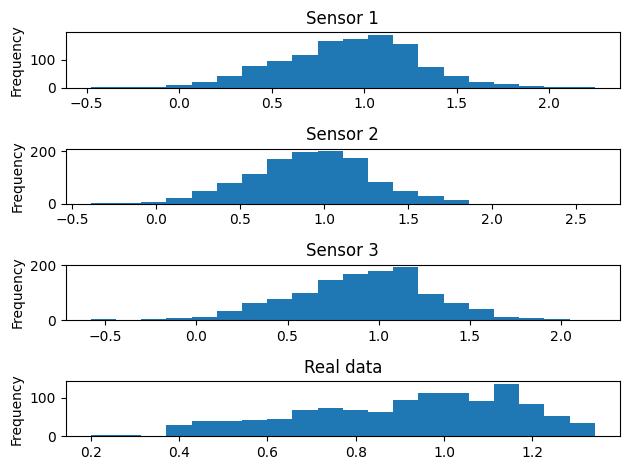

In [3]:
fig, ax = plot.subplots(4)
data['Sensor 1'].plot(kind='hist', bins=20, title='Sensor 1', ax = ax[0])
data['Sensor 3'].plot(kind='hist', bins=20, title='Sensor 3', ax = ax[2])
data['Real data'].plot(kind='hist', bins=20, title='Real data', ax = ax[3])
data['Sensor 2'].plot(kind='hist', bins=20, title='Sensor 2', ax = ax[1])
fig.tight_layout()

**secction (a)**

In [4]:
E = []
E.append(data['Real data'] - data['Sensor 1']) #Error of first sensor
E.append(data['Real data'] - data['Sensor 2'])#Error of second sensor
E.append(data['Real data'] - data['Sensor 3'])#Error of third sensor

In [5]:
MAE=[]
MSE=[]
Var = []
arr = np.array(data.values)
err = np.array(E)
for j in range(3):
  MAE.append(mae(arr[:, j],data['Real data']))
  MSE.append(mse(arr[:,j],data['Real data']))
  Var.append(np.var(err[:, j]))

print('MAE =',MAE)
print('MSE =',MSE)
print('Error Var', Var)

from prettytable import PrettyTable
table = PrettyTable(["data", "MAE", "MSE", "Error Variance"])
table.add_row(["sensor 1", "0.2038", "0.0783", "0.0470"])
table.add_row(["sensor 2", "0.2057", "0.0781", "0.0836"])
table.add_row(["sensor 3", "0.2093", "0.0789", "0.0003"])
print(table)
#sensor 3  is better than 1 is better than 2

MAE = [0.2038219933203113, 0.20576665171938094, 0.209327161430312]
MSE = [0.07830715719080268, 0.07811422294715596, 0.07888769726563243]
Error Var [0.047048600477313095, 0.08362166518295515, 0.00033338154546461315]
+----------+--------+--------+----------------+
|   data   |  MAE   |  MSE   | Error Variance |
+----------+--------+--------+----------------+
| sensor 1 | 0.2038 | 0.0783 |     0.0470     |
| sensor 2 | 0.2057 | 0.0781 |     0.0836     |
| sensor 3 | 0.2093 | 0.0789 |     0.0003     |
+----------+--------+--------+----------------+


section (b): OWA Learning Rates // **optimistic**

In [6]:
alpha=0.3
w1=alpha
w2=w1*(1-w1)
w3=(1-w1)**2
w=np.array([w1,w2,w3]).reshape(3,1)
print("optimitic weight=",np.sort(w).reshape(1,3))

optimitic weight= [[0.3  0.21 0.49]]


In [7]:
myTable = PrettyTable(["Weight", "Value"])
myTable.add_row(["W1", "0.3"])
myTable.add_row(["W2", "0.21"])
myTable.add_row(["W3", "0.49"])
print(myTable)

+--------+-------+
| Weight | Value |
+--------+-------+
|   W1   |  0.3  |
|   W2   |  0.21 |
|   W3   |  0.49 |
+--------+-------+


In [8]:
trans = np.transpose(arr[:,0:3]).reshape(1200,3)
trans.shape

(1200, 3)

In [9]:
#employing the weights and the operator to fuse the 3 data columns
#

opt = np.zeros(1200)
for i in range(1200):
  opt[i]=np.dot(trans[i],w)
opt=opt.reshape(1200,1)
MAE_OPT=mae(opt,data['Real data'])
MSE_OPT=mse(opt,data['Real data'])

print("MAE Optimistic =",MAE_OPT)
print("MSE Optimistic =",MSE_OPT)


MAE Optimistic = 0.29931184577723696
MSE Optimistic = 0.14525387704898005


<ipython-input-9-9e3dea7fe859>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  opt[i]=np.dot(trans[i],w)


In [10]:
myTable = PrettyTable(["error metric", "Value"])
myTable.add_row(["MAE Optimistic", "0.2993"])
myTable.add_row(["MSE Optimistic", "0.1452"])
print(myTable)


+----------------+--------+
|  error metric  | Value  |
+----------------+--------+
| MAE Optimistic | 0.2993 |
| MSE Optimistic | 0.1452 |
+----------------+--------+


Dispersion and Orness:

In [11]:
orness=(2*w[0]+w[1]+0*w[2])/2
disp=-(w[0]*log(w[0])+w[1]*log(w[1])+w[2]*log(w[2]))
print("Dispersion=",disp)
print("Orness=",orness)

Dispersion= [1.03846931]
Orness= [0.405]


<ipython-input-11-0452f80ba63f>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  disp=-(w[0]*log(w[0])+w[1]*log(w[1])+w[2]*log(w[2]))


In [12]:
myTable = PrettyTable(["metric", "Value"])
myTable.add_row(["orness", "0.405"])
myTable.add_row(["dispersion", "1.0384"])
print(myTable)


+------------+--------+
|   metric   | Value  |
+------------+--------+
|   orness   | 0.405  |
| dispersion | 1.0384 |
+------------+--------+


OWA Learning Rates // **pessimistic**

In [13]:
alpha=0.3
w3=(1-alpha)
w2=(1-alpha)*alpha
w1=alpha**2
w=np.array([w1,w2,w3]).reshape(3,1)
w=np.sort(w)
print("Pesimistic weight=",w.reshape(1,3))

Pesimistic weight= [[0.09 0.21 0.7 ]]


In [14]:
myTable = PrettyTable(["Pessimistic Weight", "Value"])
myTable.add_row(["W1", "0.09"])
myTable.add_row(["W2", "0.21"])
myTable.add_row(["W3", "0.7"])
print(myTable)

+--------------------+-------+
| Pessimistic Weight | Value |
+--------------------+-------+
|         W1         |  0.09 |
|         W2         |  0.21 |
|         W3         |  0.7  |
+--------------------+-------+


In [15]:

pes = np.zeros(1200)
for i in range(1200):
  pes[i]=np.dot(trans[i],w)
pes=pes.reshape(1200,1)
MAE_pes=mae(pes,data['Real data'])
MSE_pes=mse(pes,data['Real data'])

print("MAE pessimistic =",MAE_pes)
print("MSE pessimistic =",MSE_pes)

myTable = PrettyTable(["error metric", "Value"])
myTable.add_row(["MAE pessimistic", "0.3154"])
myTable.add_row(["MSE pessimistic", "0.1620"])
print(myTable)


MAE pessimistic = 0.31542660381930177
MSE pessimistic = 0.16202727405127595
+-----------------+--------+
|   error metric  | Value  |
+-----------------+--------+
| MAE pessimistic | 0.3154 |
| MSE pessimistic | 0.1620 |
+-----------------+--------+


<ipython-input-15-29fe7af8e910>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pes[i]=np.dot(trans[i],w)


In [16]:
orness=(2*w[0]+w[1]+0*w[2])/2
disp=-(w[0]*log(w[0])+w[1]*log(w[1])+w[2]*log(w[2]))
print("Dispersion=",disp)
print("Orness=",orness)

myTable = PrettyTable(["metric", "Value"])
myTable.add_row(["pessimistic orness", "0.195"])
myTable.add_row(["pessimistic dispersion", "0.7941"])
print(myTable)


Dispersion= [0.79412359]
Orness= [0.195]
+------------------------+--------+
|         metric         | Value  |
+------------------------+--------+
|   pessimistic orness   | 0.195  |
| pessimistic dispersion | 0.7941 |
+------------------------+--------+


<ipython-input-16-89c41cbc4503>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  disp=-(w[0]*log(w[0])+w[1]*log(w[1])+w[2]*log(w[2]))


Induced OWA Weights:

In [17]:
from pandas.core.indexes import multi
actual = np.array(data['Real data'])
landa=np.random.rand(3,1)
beta=0.01
epoch=100
weight=np.zeros((3,1))

for i in range(epoch):
  for j in range(150):
    E = np.exp(landa[0]) + np.exp(landa[1]) + np.exp(landa[2])
    weight[0] = np.exp(landa[0]) / E
    weight[1] = np.exp(landa[1]) / E
    weight[2] = np.exp(landa[2]) / E

    actual_hat = trans[j, 0] * weight[0] + trans[j, 1] * weight[1] + trans[j, 2] * weight[2]
    landa[0]=landa[0]-beta*weight[0]*(trans[j,0]-actual_hat)*(actual_hat-actual[j])
    landa[1]=landa[1]-beta*weight[1]*(trans[j,1]-actual_hat)*(actual_hat-actual[j])
    landa[2]=landa[2]-beta*weight[2]*(trans[j,2]-actual_hat)*(actual_hat-actual[j])


In [18]:

orness=1/2*(2*weight[0]+1*weight[1]+0*weight[2])
print("weight=",weight.reshape(1,3))
print("Orness=",orness)
disp=-weight[0]*log(weight[0])-weight[1]*log(weight[1])-weight[2]*log(weight[2])
print("Dispersion=",disp)

weight= [[0.48177805 0.27461468 0.24360728]]
Orness= [0.61908539]
Dispersion= [1.05075883]


<ipython-input-18-5ccb76068335>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  disp=-weight[0]*log(weight[0])-weight[1]*log(weight[1])-weight[2]*log(weight[2])


In [19]:
multiple=np.dot(trans,weight)
MAE=mae(multiple,actual)
MSE=mse(multiple,actual)

print("MAE inducedc=",MAE)
print("MSE induced =",MSE)


MAE inducedc= 0.2968150045192053
MSE induced = 0.14098629273444288


In [20]:
myTable = PrettyTable(["Induced","value"])
myTable.add_row(["Orness", orness])
myTable.add_row(["Dispersion", disp])

myTable.add_row(["MAE", MAE])
myTable.add_row(["MSE", MSE])
print(myTable)

+------------+---------------------+
|  Induced   |        value        |
+------------+---------------------+
|   Orness   |     [0.61908539]    |
| Dispersion |     [1.05075883]    |
|    MAE     |  0.2968150045192053 |
|    MSE     | 0.14098629273444288 |
+------------+---------------------+


In [21]:
myTable = PrettyTable(["Induced Weight", "Value"])
myTable.add_row(["W1", "0.4817"])
myTable.add_row(["W2", "0.2746"])
myTable.add_row(["W3", "0.2436"])
print(myTable)

+----------------+--------+
| Induced Weight | Value  |
+----------------+--------+
|       W1       | 0.4817 |
|       W2       | 0.2746 |
|       W3       | 0.2436 |
+----------------+--------+
